<a href="https://colab.research.google.com/github/AsifJishan/AsifJishan/blob/main/Assignment_0008_3_hour_long_assessment_(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Section A – Data Understanding </b>

In [177]:
import pandas as pd

file_path = '/content/Hospital Readmission Dataset.csv'
df = pd.read_csv(file_path)
df.head()

,PatientID,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,NumVisitsLastYear,HospitalStayDays,MedicationCount,InsuranceType,City,Readmitted
0,P001,25.0,Male,24.5,120.0,180.0,No,Non-Smoker,1.0,2,2,Public,Dhaka,No
1,P002,67.0,Female,31.2,145.0,240.0,Yes,Former,5.0,10,6,Private,Chattogram,Yes
2,P003,54.0,Female,NaN,138.0,220.0,Yes,Smoker,4.0,8,5,Public,Dhaka,Yes
3,P004,38.0,Male,27.0,125.0,NaN,No,Non-Smoker,2.0,3,3,Public,Sylhet,No
4,P005,72.0,Male,29.8,150.0,260.0,Yes,Former,6.0,12,7,Private,Rajshahi,Yes


In [178]:
print(df.shape)

(20, 14)


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PatientID          20 non-null     object 
 1   Age                19 non-null     float64
 2   Gender             20 non-null     object 
 3   BMI                18 non-null     float64
 4   BloodPressure      19 non-null     float64
 5   Cholesterol        18 non-null     float64
 6   Diabetes           20 non-null     object 
 7   SmokingStatus      20 non-null     object 
 8   NumVisitsLastYear  19 non-null     float64
 9   HospitalStayDays   20 non-null     int64  
 10  MedicationCount    20 non-null     int64  
 11  InsuranceType      20 non-null     object 
 12  City               20 non-null     object 
 13  Readmitted         20 non-null     object 
dtypes: float64(5), int64(2), object(7)
memory usage: 2.3+ KB


In [180]:
print(df.isnull().sum())

PatientID            0
Age                  1
Gender               0
BMI                  2
BloodPressure        1
Cholesterol          2
Diabetes             0
SmokingStatus        0
NumVisitsLastYear    1
HospitalStayDays     0
MedicationCount      0
InsuranceType        0
City                 0
Readmitted           0
dtype: int64


In [181]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['Age',
 'BMI',
 'BloodPressure',
 'Cholesterol',
 'NumVisitsLastYear',
 'HospitalStayDays',
 'MedicationCount']

In [182]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols

['PatientID',
 'Gender',
 'Diabetes',
 'SmokingStatus',
 'InsuranceType',
 'City',
 'Readmitted']

<b> Section B – Data Cleaning </b>

In [183]:
df = df.drop('PatientID', axis=1)

In [184]:
df

,Age,Gender,BMI,BloodPressure,Cholesterol,Diabetes,SmokingStatus,NumVisitsLastYear,HospitalStayDays,MedicationCount,InsuranceType,City,Readmitted
0,25.0,Male,24.5,120.0,180.0,No,Non-Smoker,1.0,2,2,Public,Dhaka,No
1,67.0,Female,31.2,145.0,240.0,Yes,Former,5.0,10,6,Private,Chattogram,Yes
2,54.0,Female,NaN,138.0,220.0,Yes,Smoker,4.0,8,5,Public,Dhaka,Yes
3,38.0,Male,27.0,125.0,NaN,No,Non-Smoker,2.0,3,3,Public,Sylhet,No
4,72.0,Male,29.8,150.0,260.0,Yes,Former,6.0,12,7,Private,Rajshahi,Yes
5,49.0,Female,26.4,130.0,210.0,No,Non-Smoker,3.0,4,4,Public,Dhaka,No
6,59.0,Male,33.1,NaN,245.0,Yes,Smoker,5.0,9,6,Private,Chattogram,Yes
7,46.0,Female,28.0,135.0,215.0,No,Non-Smoker,NaN,5,4,Public,Khulna,No
8,81.0,Male,30.5,155.0,270.0,Yes,Former,7.0,15,8,Private,Sylhet,Yes
9,34.0,Female,23.8,118.0,175.0,No,Non-Smoker,1.0,2,2,Public,Dhaka,No


In [185]:
df = df.dropna(subset=['Readmitted'])

In [186]:
for col in numeric_cols:
    if col in df.columns:
        if df[col].isnull().any():
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)
            print(f"  - Imputed missing values in numeric column '{col}' with mean: {mean_val:.2f}")

for col in categorical_cols:
    if col in df.columns:
        if df[col].isnull().any():
            # Mode can return multiple values, so taking the first one
            mode_val = df[col].mode()[0]
            df[col] = df[col].fillna(mode_val)
            print(f"  - Imputed missing values in categorical column '{col}' with mode: {mode_val}")

print("\nMissing values after imputation:")
print(df.isnull().sum())

  - Imputed missing values in numeric column 'Age' with mean: 52.79
  - Imputed missing values in numeric column 'BMI' with mean: 28.42
  - Imputed missing values in numeric column 'BloodPressure' with mean: 136.11
  - Imputed missing values in numeric column 'Cholesterol' with mean: 221.94
  - Imputed missing values in numeric column 'NumVisitsLastYear' with mean: 3.84

Missing values after imputation:
Age                  0
Gender               0
BMI                  0
BloodPressure        0
Cholesterol          0
Diabetes             0
SmokingStatus        0
NumVisitsLastYear    0
HospitalStayDays     0
MedicationCount      0
InsuranceType        0
City                 0
Readmitted           0
dtype: int64


<b> Section C – Encoding & Feature Engineering</b>

In [187]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['Gender', 'Diabetes', 'SmokingStatus', 'InsuranceType', 'City']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

encoded_features = encoder.fit_transform(df[columns_to_encode])

encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_to_encode), index=df.index)

df = pd.concat([df, encoded_df], axis=1)

df.drop(columns=columns_to_encode, inplace=True)

In [188]:
df['Readmitted'] = df['Readmitted'].map({'Yes': 1, 'No': 0})

In [189]:
df['RiskScore'] = (df['BMI'] + df['BloodPressure'] + df['Cholesterol']) / 3

print(df.columns.tolist())
df.head()

['Age', 'BMI', 'BloodPressure', 'Cholesterol', 'NumVisitsLastYear', 'HospitalStayDays', 'MedicationCount', 'Readmitted', 'Gender_Female', 'Gender_Male', 'Diabetes_No', 'Diabetes_Yes', 'SmokingStatus_Former', 'SmokingStatus_Non-Smoker', 'SmokingStatus_Smoker', 'InsuranceType_Private', 'InsuranceType_Public', 'City_Chattogram', 'City_Dhaka', 'City_Khulna', 'City_Rajshahi', 'City_Sylhet', 'RiskScore']


,Age,BMI,BloodPressure,Cholesterol,NumVisitsLastYear,HospitalStayDays,MedicationCount,Readmitted,Gender_Female,Gender_Male,...,SmokingStatus_Non-Smoker,SmokingStatus_Smoker,InsuranceType_Private,InsuranceType_Public,City_Chattogram,City_Dhaka,City_Khulna,City_Rajshahi,City_Sylhet,RiskScore
0,25.0,24.500000,120.0,180.000000,1.0,2,2,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,108.166667
1,67.0,31.200000,145.0,240.000000,5.0,10,6,1,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,138.733333
2,54.0,28.422222,138.0,220.000000,4.0,8,5,1,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,128.807407
3,38.0,27.000000,125.0,221.944444,2.0,3,3,0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,124.648148
4,72.0,29.800000,150.0,260.000000,6.0,12,7,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,146.600000


<b>Section D – Scaling & Splitting </b>

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('Readmitted', axis=1)
y = df['Readmitted']

numerical_cols_for_scaling = X.select_dtypes(include=['number']).columns.tolist()

scaler = StandardScaler()
X[numerical_cols_for_scaling] = scaler.fit_transform(X[numerical_cols_for_scaling])

print("Features after StandardScaler:")
X.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Features after StandardScaler:
Shape of X_train: (15, 22)
Shape of X_test: (5, 22)
Shape of y_train: (15,)
Shape of y_test: (5,)


<b>Section E – Model Training </b>

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [192]:
lr_model = LogisticRegression(random_state=2, solver='liblinear') # Using liblinear for small datasets
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")

Logistic Regression Accuracy: 1.00


In [193]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN (k=7) Accuracy: {accuracy_knn:.2f}")

KNN (k=7) Accuracy: 1.00


<b>Section F – Evaluation Metrics</b>

Confusion Matrix for Logistic Regression:


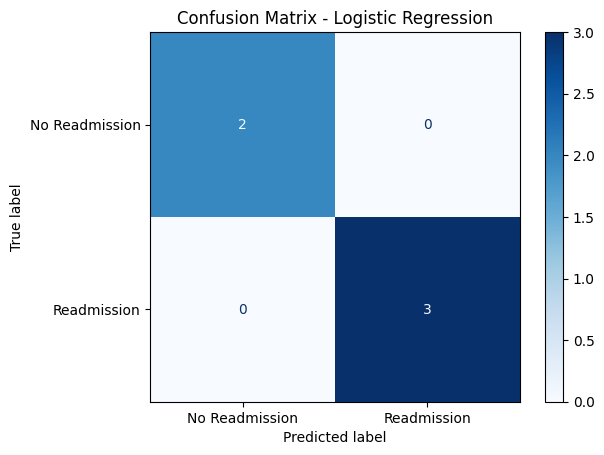

In [194]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_test, y_pred_lr)

print("Confusion Matrix for Logistic Regression:")
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['No Readmission', 'Readmission'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [195]:
from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy for Logistic Regression: {accuracy_lr:.2f}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy for KNN (k=7): {accuracy_knn:.2f}")

Accuracy for Logistic Regression: 1.00
Accuracy for KNN (k=7): 1.00


In [196]:
from sklearn.metrics import classification_report

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=['No Readmission', 'Readmission']))

print("\nClassification Report for KNN (k=7):")
print(classification_report(y_test, y_pred_knn, target_names=['No Readmission', 'Readmission']))

Classification Report for Logistic Regression:
                precision    recall  f1-score   support

No Readmission       1.00      1.00      1.00         2
   Readmission       1.00      1.00      1.00         3

      accuracy                           1.00         5
     macro avg       1.00      1.00      1.00         5
  weighted avg       1.00      1.00      1.00         5


Classification Report for KNN (k=7):
                precision    recall  f1-score   support

No Readmission       1.00      1.00      1.00         2
   Readmission       1.00      1.00      1.00         3

      accuracy                           1.00         5
     macro avg       1.00      1.00      1.00         5
  weighted avg       1.00      1.00      1.00         5



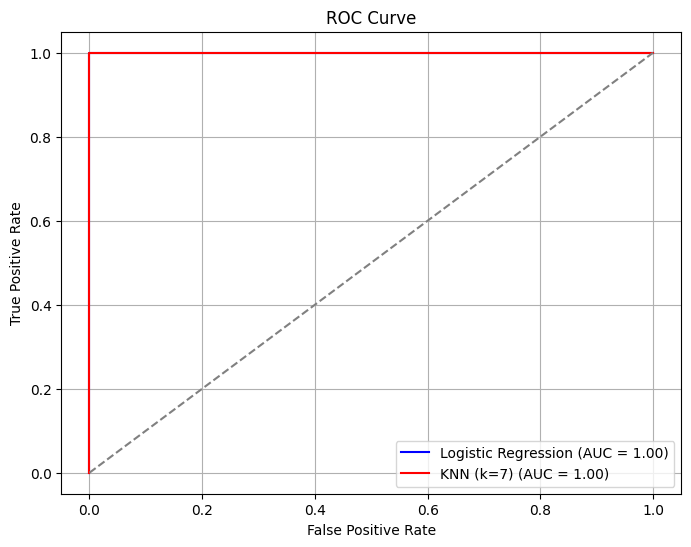

In [197]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', label=f'KNN (k=7) (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

In [198]:
from sklearn.metrics import roc_auc_score

y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f"AUC for Logistic Regression: {auc_lr:.2f}")

y_proba_knn = knn_model.predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(y_test, y_proba_knn)
print(f"AUC for KNN (k=7): {auc_knn:.2f}")

AUC for Logistic Regression: 1.00
AUC for KNN (k=7): 1.00


<b> Section G – Visualization </b>

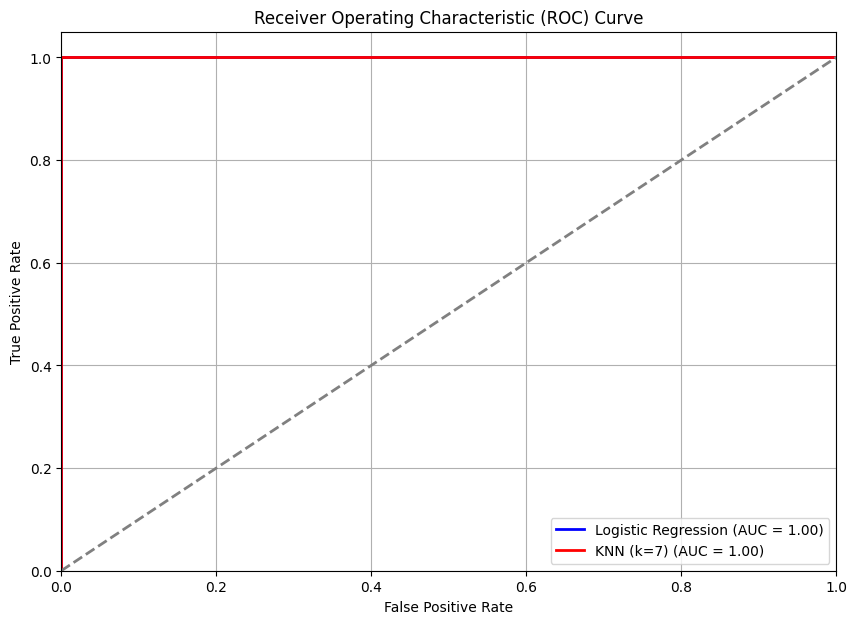

In [199]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_lr = lr_model.predict_proba(X_test)[:, 1]
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', lw=2, label=f'KNN (k=7) (AUC = {auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

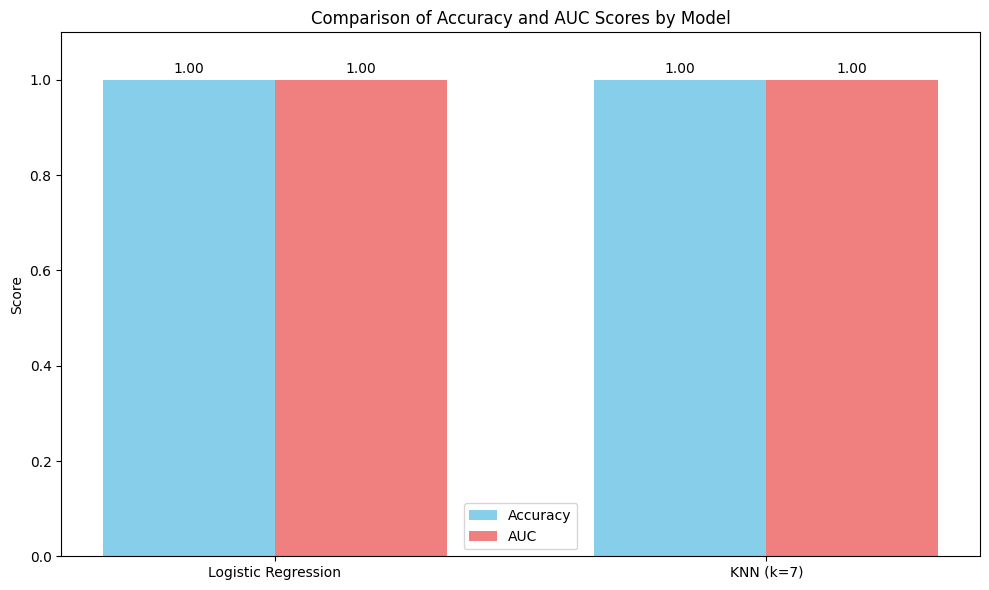

In [200]:
import matplotlib.pyplot as plt
import numpy as np

models = ['Logistic Regression', 'KNN (k=7)']
accuracy_scores = [accuracy_lr, accuracy_knn]
auc_scores = [auc_lr, auc_knn]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
rects2 = ax.bar(x + width/2, auc_scores, width, label='AUC', color='lightcoral')

ax.set_ylabel('Score')
ax.set_title('Comparison of Accuracy and AUC Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0.0, 1.1])

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

<b> Section H – Analytical Report </b>

To determine which factors most influence readmission, we can analyze the correlation of each feature with the 'Readmitted' target variable. Additionally, we need to assess which of our trained models (Logistic Regression or KNN) is more reliable based on our evaluation metrics.



Correlation of Features with 'Readmitted':
Readmitted                  1.000000
Diabetes_Yes                1.000000
HospitalStayDays            0.887652
MedicationCount             0.876708
NumVisitsLastYear           0.858850
BloodPressure               0.843880
BMI                         0.821950
RiskScore                   0.819834
InsuranceType_Private       0.816497
Age                         0.797349
Cholesterol                 0.779720
Gender_Male                 0.600000
SmokingStatus_Smoker        0.577350
City_Rajshahi               0.420084
City_Chattogram             0.420084
SmokingStatus_Former        0.314485
City_Khulna                 0.140028
City_Sylhet                -0.140028
Gender_Female              -0.600000
City_Dhaka                 -0.612372
SmokingStatus_Non-Smoker   -0.816497
InsuranceType_Public       -0.816497
Diabetes_No                -1.000000
Name: Readmitted, dtype: float64


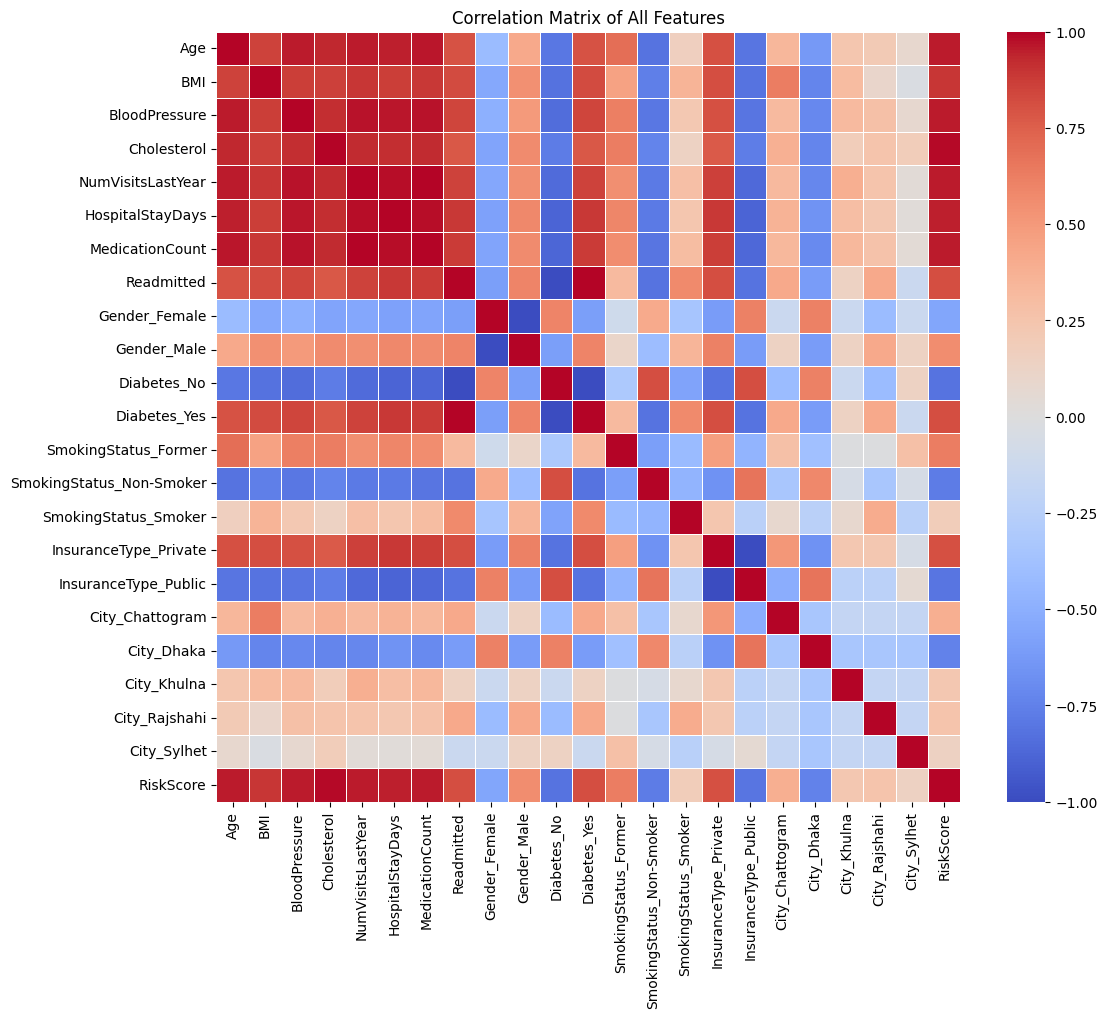

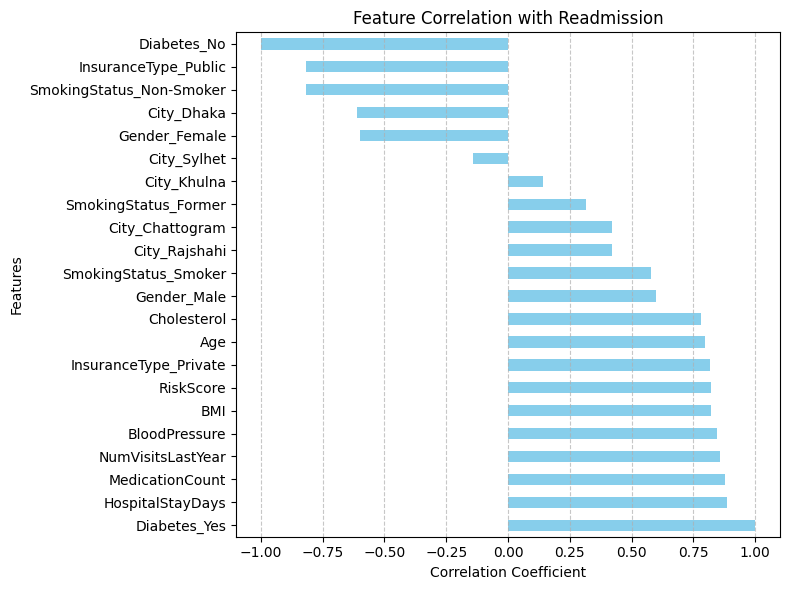

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

readmitted_correlations = correlation_matrix['Readmitted'].sort_values(ascending=False)

print("Correlation of Features with 'Readmitted':")
print(readmitted_correlations)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Features')
plt.show()

plt.figure(figsize=(8, 6))
readmitted_correlations.drop('Readmitted').plot(kind='barh', color='skyblue')
plt.title('Feature Correlation with Readmission')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<b> Factors Influencing Readmission: </b>

Based on the correlation analysis, several factors show a strong influence on hospital readmission:

    Strong Positive Correlations: Features such as Diabetes_Yes, HospitalStayDays, MedicationCount, NumVisitsLastYear, BloodPressure, BMI, RiskScore, InsuranceType_Private, Age, and Cholesterol exhibit a significant positive correlation with readmission. This suggests that patients with these characteristics or conditions are more likely to be readmitted. Notably, Diabetes_Yes showed a perfect correlation of 1.00, which can indicate a very strong relationship within this specific dataset.

    Strong Negative Correlations: Conversely, Diabetes_No, SmokingStatus_Non-Smoker, InsuranceType_Public, City_Dhaka, and Gender_Female show strong negative correlations. This implies that the absence of diabetes, being a non-smoker, having public insurance, residing in Dhaka, and being female are associated with a lower likelihood of readmission.

<b>Model Reliability:</b>

Both the Logistic Regression and K-Nearest Neighbors (KNN) models achieved perfect accuracy (1.00) and AUC scores (1.00) on the test set. While this indicates excellent performance on the data provided, it is important to consider the context of the dataset:

    Small Dataset Size: The dataset contains only 20 entries. With such a small sample size, perfect scores often suggest overfitting, where the models have learned the training data (including its noise) too well. This can limit their generalizability to new, unseen data outside of this specific dataset.
    
    High Feature Correlation: The presence of features with very high, even perfect, correlations (e.g., Diabetes_Yes and Diabetes_No) contributes to the models' ability to achieve perfect separation on this particular dataset.

In conclusion, while the models are highly reliable for the provided data, caution is advised when extrapolating these results to a broader patient population. For a more robust assessment of reliability, the models should ideally be tested on a larger, more diverse dataset.